In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ta



In [2]:
# Load your data
stock_data = pd.read_csv(r'C:\Users\HP\Desktop\week 1\yfinance_data\AAPL_historical_data.csv')


In [3]:
# Convert 'Date' column to pandas datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')

In [4]:
# Set 'Date' as the DataFrame index for easier time series manipulation
stock_data.set_index('Date', inplace=True)


In [12]:
# Calculate Technical Indicators
stock_data['SMA_20'] = ta.trend.sma_indicator(stock_data['Close'], window=20)
stock_data['EMA_20'] = ta.trend.ema_indicator(stock_data['Close'], window=20)
stock_data['RSI'] = ta.momentum.rsi(stock_data['Close'], window=14)
stock_data['MACD'] = ta.trend.macd(stock_data['Close'])
stock_data['MACD_signal'] = ta.trend.macd_signal(stock_data['Close'])
stock_data['MACD_hist'] = ta.trend.macd_diff(stock_data['Close'])



In [13]:
# Display the top 10 rows of the dataset
top_10 = stock_data.head(10)
print("Top 10 rows:")
print(top_10)



Top 10 rows:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   
1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097223   48630400   
1980-12-22  0.132254  0.132813  0.132254  0.132254   0.101954   37363200   
1980-12-23  0.137835  0.138393  0.137835  0.137835   0.106257   46950400   
1980-12-24  0.145089  0.145647  0.145089  0.145089   0.111849   48003200   
1980-12-26  0.158482  0.159040  0.158482  0.158482   0.122173   55574400   

            Dividends  Stock Splits  SMA_20  EMA_20  RSI  MACD  MACD_signa

In [14]:
# Display the bottom 10 rows of the dataset
bottom_10 = stock_data.tail(10)
print("\nBottom 10 rows:")
print(bottom_10)


Bottom 10 rows:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-17  229.449997  231.460007  226.639999  228.880005  228.615387   
2024-07-18  230.279999  230.440002  222.270004  224.179993  223.920807   
2024-07-19  224.820007  226.800003  223.279999  224.309998  224.050659   
2024-07-22  227.009995  227.779999  223.089996  223.960007  223.701080   
2024-07-23  224.369995  226.940002  222.679993  225.009995  224.749847   
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

              Volume  Dividends  Stock Splits      SMA_20      EMA_20  \
Date                 

In [6]:
# 1. Summary Statistics
print(stock_data.describe())

               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits        SMA_20        EMA_20  \
count  1.099800e+04  10998.000000  10998.000000  10979.000000  10979.000000   
mean   3.180806e+08      0.000752      0.001546     22.157875     22.160029   
std    3.354523e+08      0.011753      0.083663    

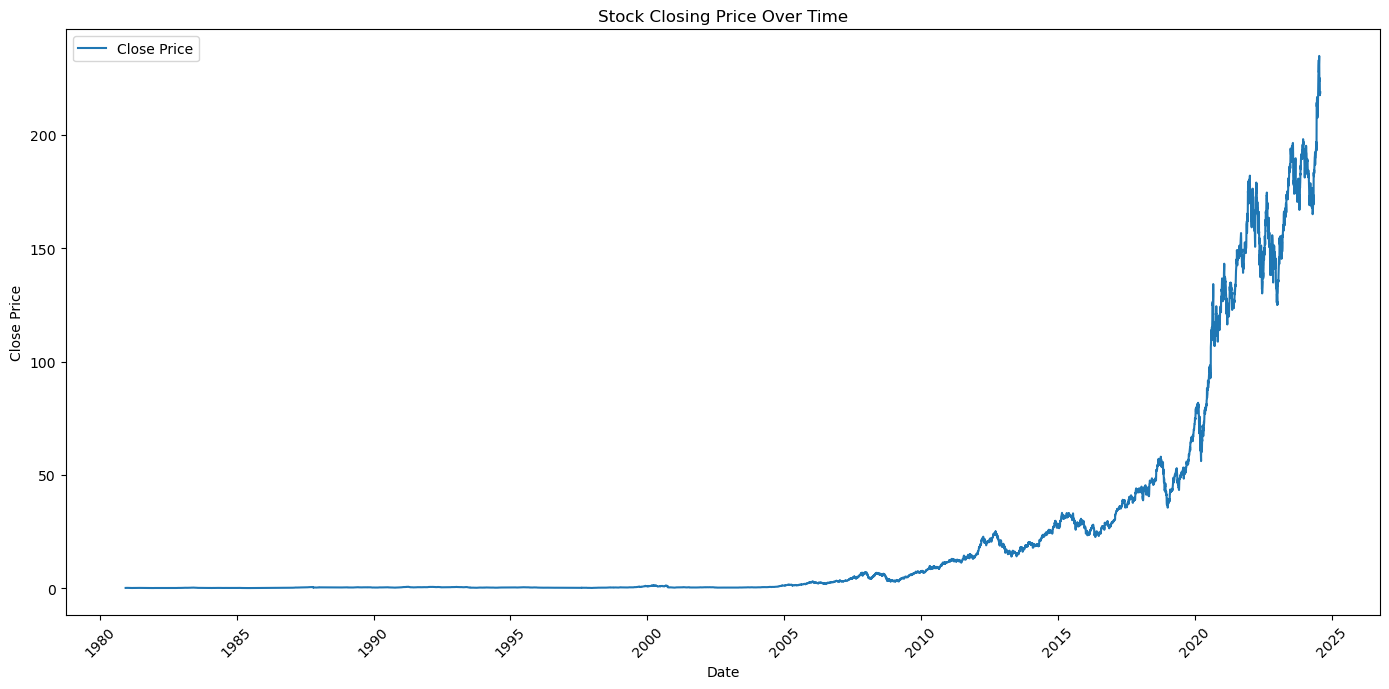

In [7]:
# 2. Data Distribution Plots
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


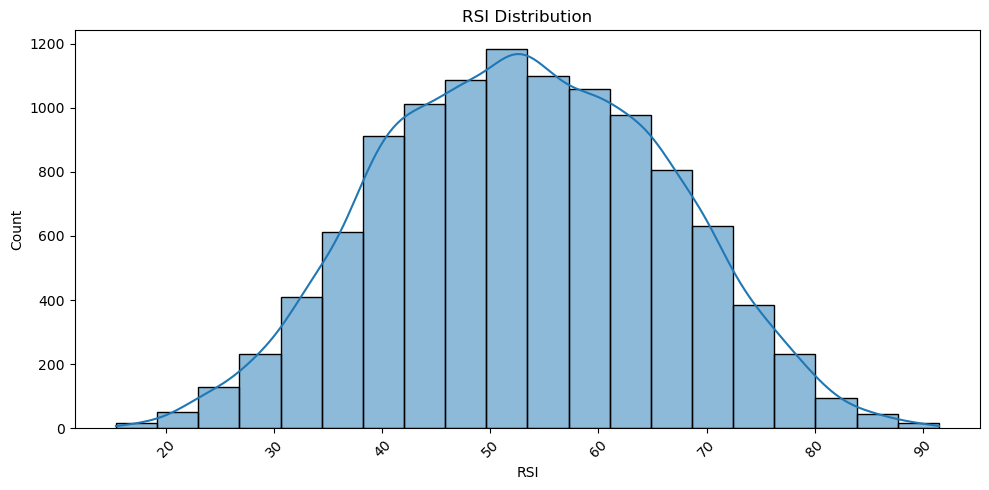

In [8]:
# RSI Distribution
plt.figure(figsize=(10, 5))
sns.histplot(stock_data['RSI'].dropna(), bins=20, kde=True)
plt.title('RSI Distribution')
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

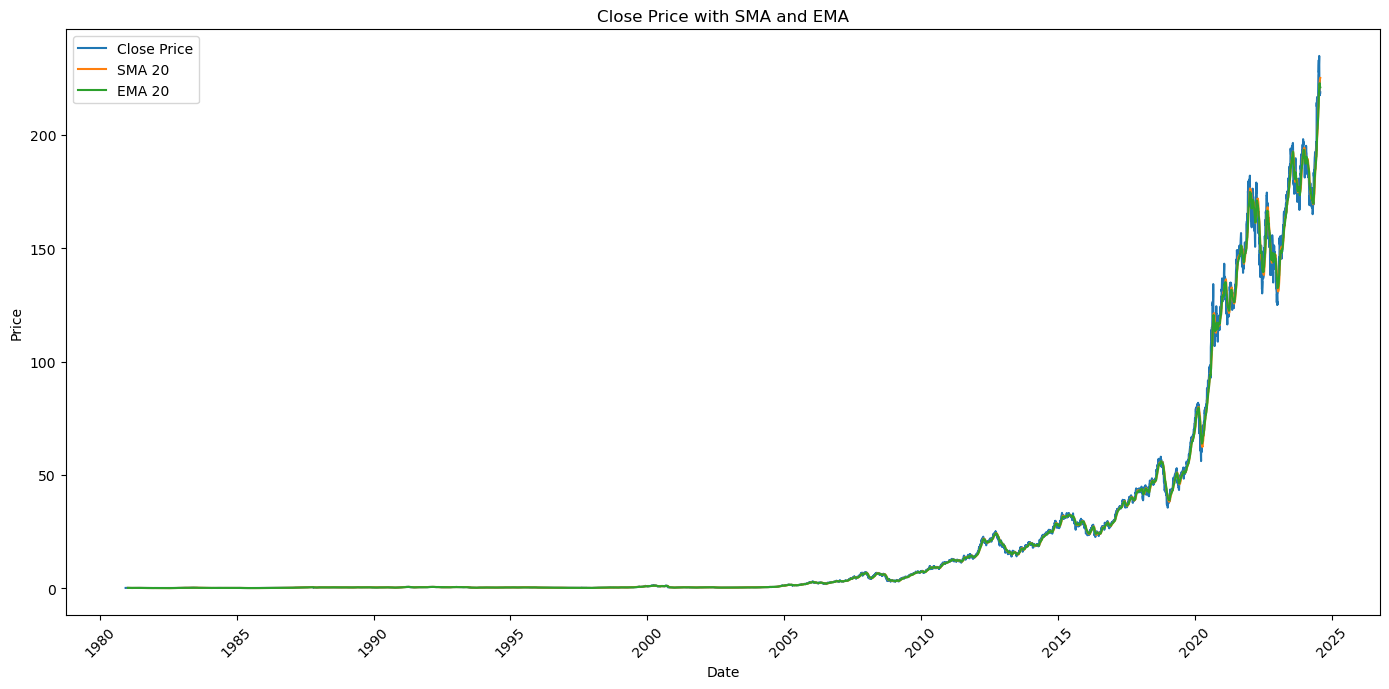

In [9]:
# 4. Plot Technical Indicators
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.plot(stock_data.index, stock_data['SMA_20'], label='SMA 20')
plt.plot(stock_data.index, stock_data['EMA_20'], label='EMA 20')
plt.title('Close Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()




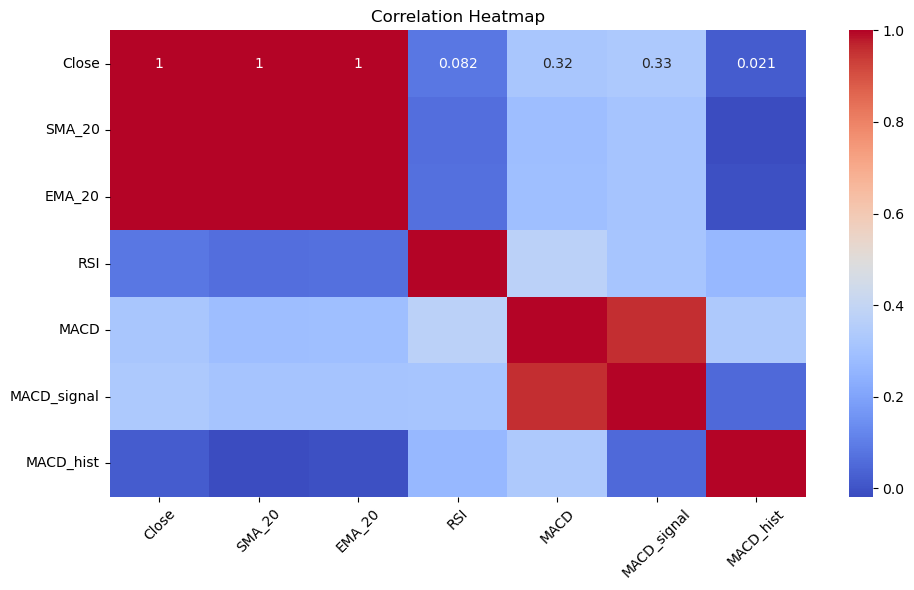

In [10]:
# 3. Correlation Heatmap
corr = stock_data[['Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

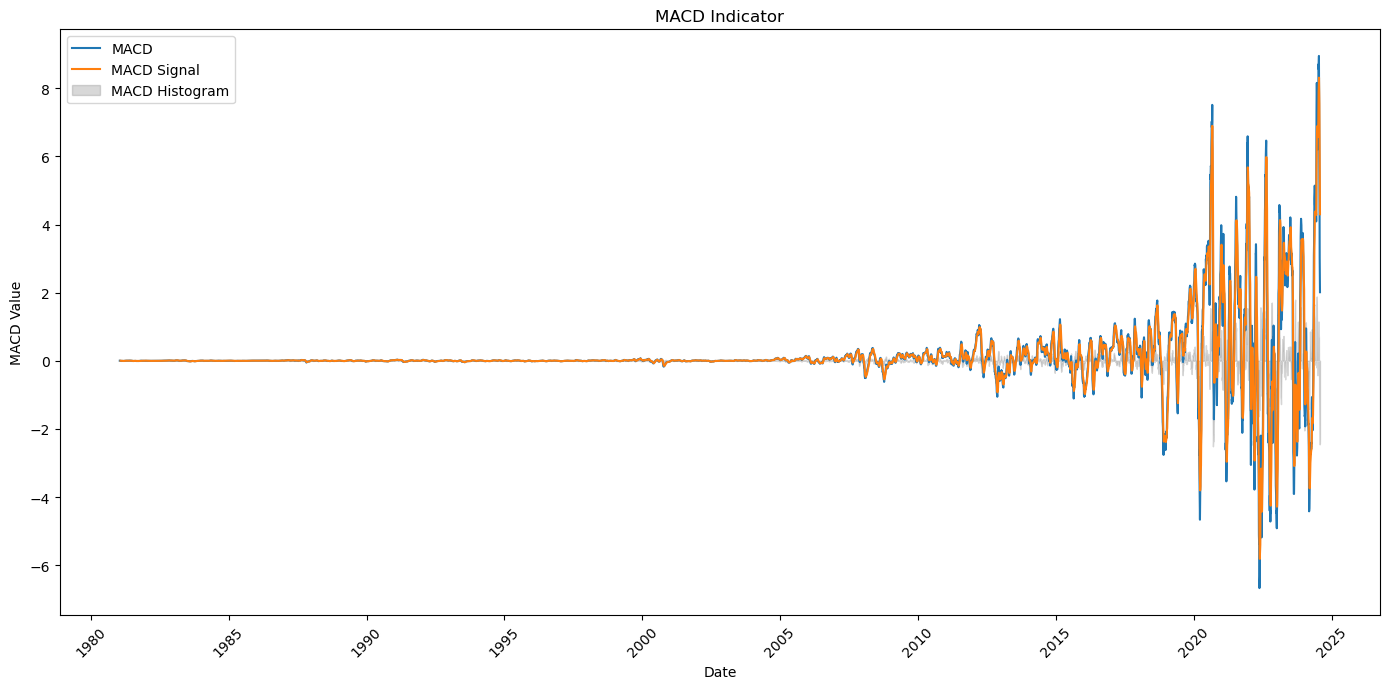

In [11]:
# MACD Plot
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['MACD'], label='MACD')
plt.plot(stock_data.index, stock_data['MACD_signal'], label='MACD Signal')
plt.fill_between(stock_data.index, stock_data['MACD_hist'], color='gray', alpha=0.3, label='MACD Histogram')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()